In [1]:
import random
import numpy as np
import pandas as pd
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


In [3]:
root = 'E:\jupyter\CS231n\Assignment1\data\cifar-10-batches-py'
X_train,Y_train,X_test,Y_test = load_CIFAR10(root)

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


0 plane
1 car
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


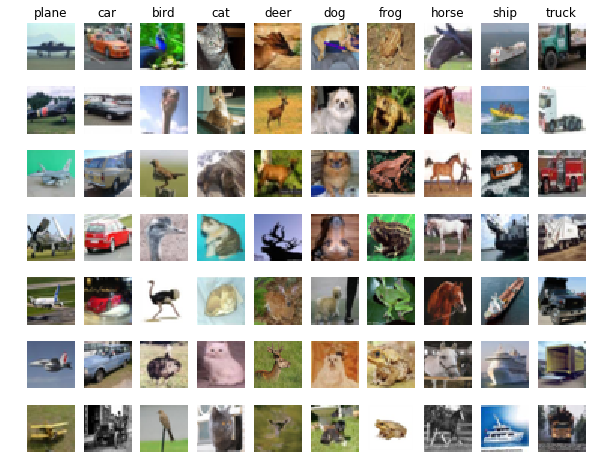

In [6]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y , cls in enumerate(classes):
    print(y,cls)
    idxs = np.flatnonzero(Y_train == y)#取index
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1#对应子图的index 
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [8]:
num_training = 5000
mask = range(num_training)
print(mask)
X_train = X_train[mask]
Y_train = Y_train[mask]

num_test = 500
mask = range(num_test)
X_test = X_test[mask]
Y_test = Y_test[mask]
print(X_train.shape)

range(0, 5000)
(5000, 32, 32, 3)


In [9]:
X_train = np.reshape(X_train,(X_train.shape[0],-1))
X_test = np.reshape(X_test,(X_test.shape[0],-1))
print(X_train.shape,X_test.shape)

(5000, 3072) (500, 3072)


In [11]:
from sklearn import neighbors  

clf1 = neighbors.KNeighborsClassifier(algorithm='kd_tree')  
clf1.fit(X_train, Y_train)  

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
from classifiers.k_nearest_neighbor import KNN

clf2 = KNN()
clf2.train(X_train,Y_train)

(500, 5000)


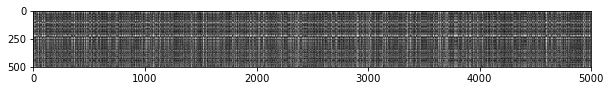

In [23]:
dists = clf2.compute_distances_no_loops(X_test)
print(dists.shape)
plt.imshow(dists, interpolation='none')
plt.show()

In [24]:
y_test_pred = clf2.predict_labels(dists,1)
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [25]:
y_test_pred = clf2.predict_labels(dists,5)
num_correct = np.sum(y_test_pred == Y_test)
accuracy = float(num_correct) / num_test
print ('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


In [46]:
#cross_validation 找出最佳的k值
num_folds = 5
k_choice = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
Y_train_folds = []

X_train_folds = np.array_split(X_train,num_folds)
Y_train_folds = np.array_split(Y_train,num_folds)

k_to_accuracies = {}

for k in k_choice:
    accuracies = []
    for i in range(num_folds):
        x_test = X_train_folds[i]
        y_test = Y_train_folds[i]
        x_train = np.vstack(X_train_folds[0:i] + X_train_folds[i+1:])#[0:i] 指0<=x<i
        y_train = np.hstack(Y_train_folds[0:i] + Y_train_folds[i+1:])
        
        clf2.train(x_train,y_train)
        dists = clf2.compute_distances_no_loops(x_test)
        y_test_pred = clf2.predict_labels(dists,k)
        correct_nums = np.sum(y_test_pred == y_test)
        accuracies.append(float(correct_nums) / float(y_test.shape[0]))
    k_to_accuracies[k] = accuracies
        
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))



k = 1, accuracy = 0.263000
k = 1, accuracy = 0.257000
k = 1, accuracy = 0.264000
k = 1, accuracy = 0.278000
k = 1, accuracy = 0.266000
k = 3, accuracy = 0.239000
k = 3, accuracy = 0.249000
k = 3, accuracy = 0.240000
k = 3, accuracy = 0.266000
k = 3, accuracy = 0.254000
k = 5, accuracy = 0.248000
k = 5, accuracy = 0.266000
k = 5, accuracy = 0.280000
k = 5, accuracy = 0.292000
k = 5, accuracy = 0.280000
k = 8, accuracy = 0.262000
k = 8, accuracy = 0.282000
k = 8, accuracy = 0.273000
k = 8, accuracy = 0.290000
k = 8, accuracy = 0.273000
k = 10, accuracy = 0.265000
k = 10, accuracy = 0.296000
k = 10, accuracy = 0.276000
k = 10, accuracy = 0.284000
k = 10, accuracy = 0.280000
k = 12, accuracy = 0.260000
k = 12, accuracy = 0.295000
k = 12, accuracy = 0.279000
k = 12, accuracy = 0.283000
k = 12, accuracy = 0.280000
k = 15, accuracy = 0.252000
k = 15, accuracy = 0.289000
k = 15, accuracy = 0.278000
k = 15, accuracy = 0.282000
k = 15, accuracy = 0.274000
k = 20, accuracy = 0.270000
k = 20, accu

[ 0.2656  0.2496  0.2732  0.276   0.2802  0.2794  0.275   0.279   0.2744
  0.2616]


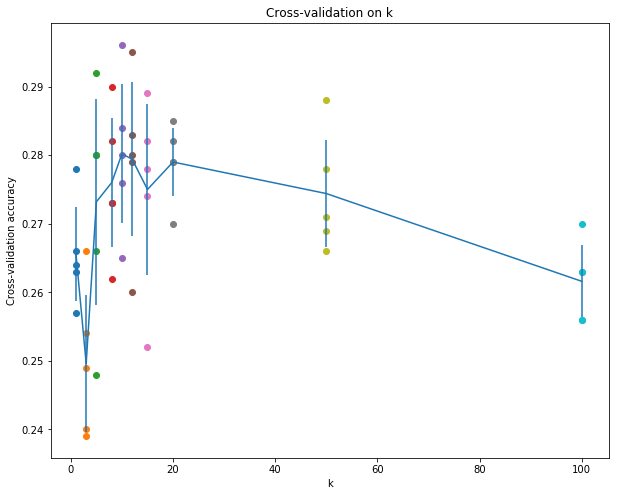

In [49]:
#将上面结果可视化
for k in k_choice:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies),accuracies)#一列4个点

accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
print(accuracies_mean)
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)#误差棒图
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()
#由图 取 k = 10